In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('../data/curated/rent.csv')
df

,Year,Month,Median,Bed,Apartment,postcode,park_count,mean_park_area,Camp,Language,...,2018_y,2019_y,2020_y,2021_y,2022_y,2023_y,2024_y,2025_y,2026_y,2027_y
0,2019,Dec,370,1,1,3182,1,218.4940,0,0,...,29239,29443,29028,26176,26538,28666,31004,31588,32182,32787
1,2019,Jun,350,1,1,3182,1,218.4940,0,0,...,29239,29443,29028,26176,26538,28666,31004,31588,32182,32787
2,2019,Mar,350,1,1,3182,1,218.4940,0,0,...,29239,29443,29028,26176,26538,28666,31004,31588,32182,32787
3,2019,Sep,360,1,1,3182,1,218.4940,0,0,...,29239,29443,29028,26176,26538,28666,31004,31588,32182,32787
4,2020,Dec,350,1,1,3182,1,218.4940,0,0,...,29239,29443,29028,26176,26538,28666,31004,31588,32182,32787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29321,2024,Aug,1000,4,0,3796,6,1275.9650,0,0,...,10086,10059,9949,9866,9807,9919,10168,10207,10247,10288
29322,2024,Aug,582,4,0,3752,5,745.4096,0,0,...,25719,25821,25798,25227,25114,25467,40203,43016,46026,49246
29323,2024,Aug,872,4,0,3107,2,471.7175,0,0,...,14419,14441,14581,14280,14346,14445,14602,14657,14712,14768
29324,2024,Aug,500,3,0,3750,1,1290.2160,0,0,...,14544,17309,20975,24807,28244,30758,49244,63781,82609,106996


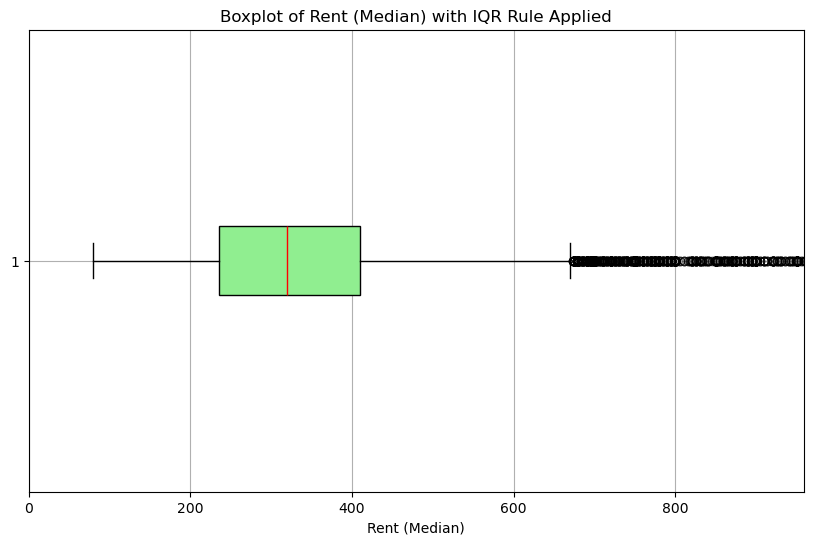

In [45]:
# Calculated data volume
N = len(df['Median'].dropna())

# Calculate the quartile and IQR
Q1 = np.percentile(df['Median'].dropna(), 25)
Q3 = np.percentile(df['Median'].dropna(), 75)
IQR = Q3 - Q1

# Apply the corresponding outlier determination rule based on the number of records N
if N <= 100:
    factor = 1.5
else:
    factor = (np.sqrt(np.log(N) - 0.5))

# Calculate the upper and lower limits of outliers
lower_bound = Q1 - factor * IQR
upper_bound = Q3 + factor * IQR

# Plot a boxplot of the rent and apply the outlier range according to the new IQR rules
plt.figure(figsize=(10, 6))
plt.boxplot(df['Median'].dropna(), vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', color='red', alpha=0.5))

plt.xlim(0, upper_bound)  # Set the upper bound to the new IQR rule upper bound
plt.title('Boxplot of Rent (Median) with IQR Rule Applied')
plt.xlabel('Rent (Median)')
plt.grid(True)

plt.show()


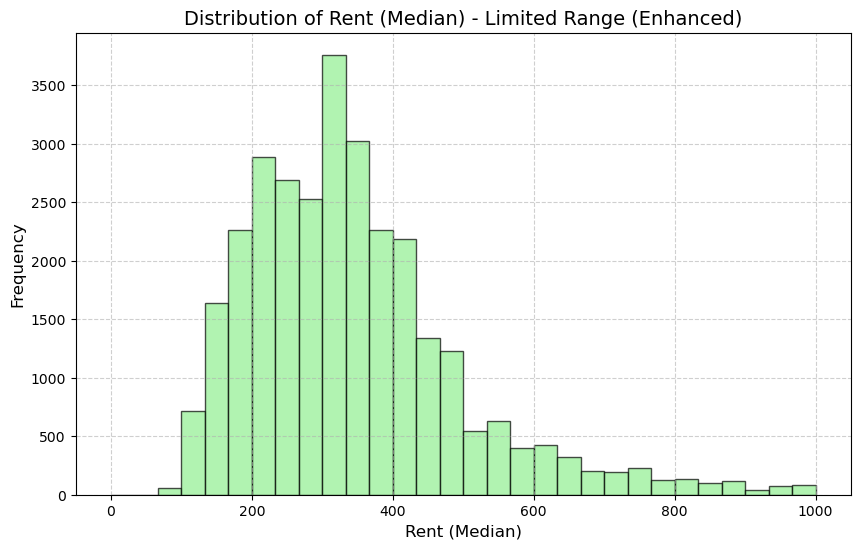

In [41]:
# Narrow the X-axis range, exclude extreme values, and select a reasonable interval (such as 0-1000) for histogram drawing
plt.figure(figsize=(10, 6))
plt.hist(df['Median'].dropna(), bins=30, range=(0, 1000), edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Distribution of Rent (Median) - Limited Range (Enhanced)', fontsize=14)
plt.xlabel('Rent (Median)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

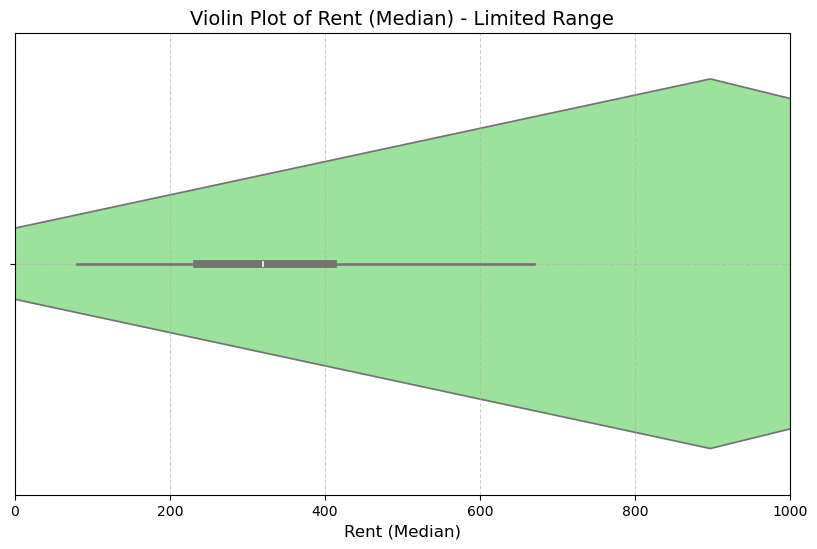

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Median'].dropna(), color='lightgreen')
plt.xlim(0, 1000)  # Set the X-axis range
plt.title('Violin Plot of Rent (Median) - Limited Range', fontsize=14)
plt.xlabel('Rent (Median)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

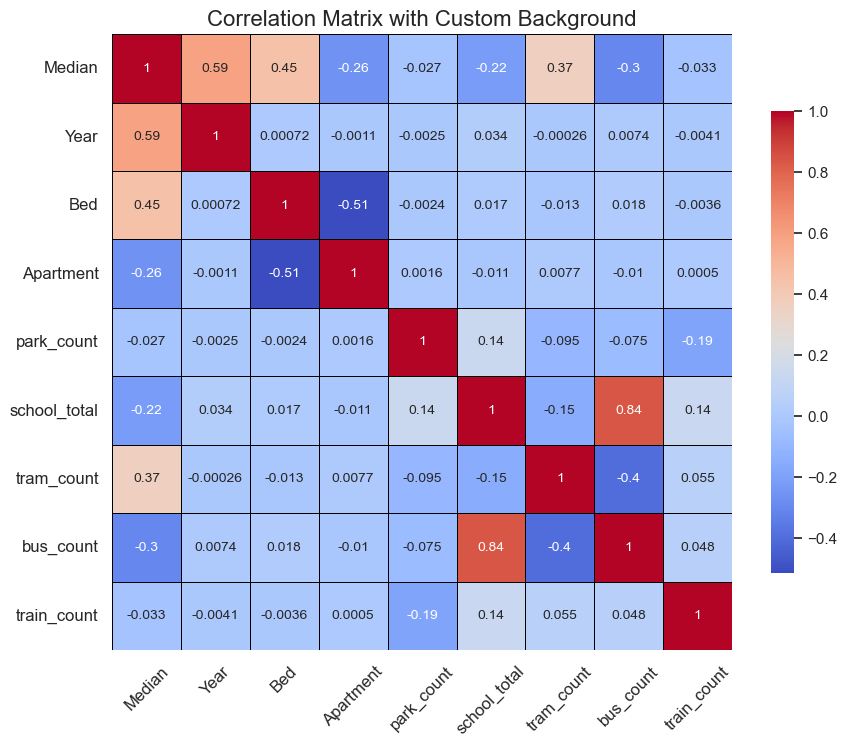

In [11]:
corr_matrix = df[['Median', 'Year', 'Bed', 'Apartment', 'park_count', 'school_total', 'tram_count', 'bus_count', 'train_count']].corr()
plt.figure(figsize=(10, 8))

sns.set(style="whitegrid")  
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', annot_kws={"size": 10}, 
                 cbar_kws={'shrink': 0.75}, 
                 facecolor="lightgrey")

plt.title("Correlation Matrix with Custom Background", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()

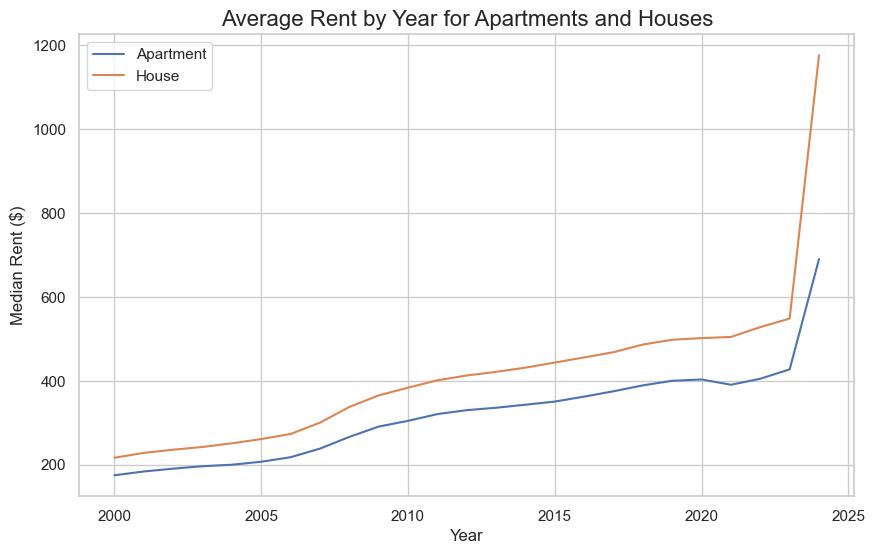

In [53]:
# Prepare the data and group it according to the conditions of Apartment=0 and 1
df_apartment = df[df['Apartment'] == 1].groupby('Year')['Median'].mean()
df_house = df[df['Apartment'] == 0].groupby('Year')['Median'].mean()

plt.figure(figsize=(10, 6))
plt.plot(df_apartment.index, df_apartment.values, label='Apartment')
plt.plot(df_house.index, df_house.values, label='House')

plt.title('Average Rent by Year for Apartments and Houses', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Rent ($)', fontsize=12)

plt.legend()

plt.grid(True)
plt.show()

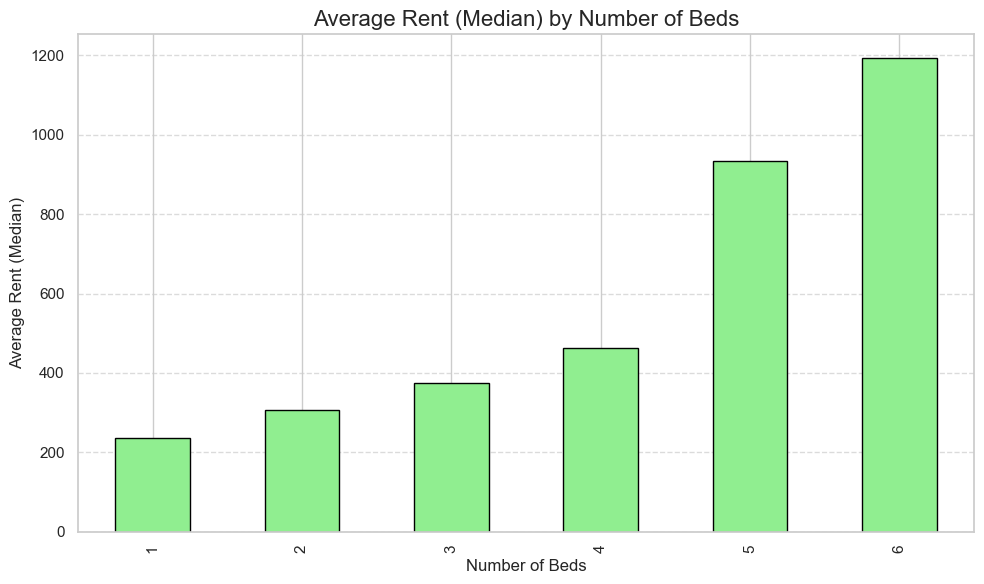

In [65]:
# Calculate the average median rent per bed and limit the number of beds to a maximum of 6
df_bed_median = df[df['Bed'] <= 6].groupby('Bed')['Median'].mean()

# Draw a bar chart
plt.figure(figsize=(10, 6))
df_bed_median.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Average Rent (Median) by Number of Beds', fontsize=16)
plt.xlabel('Number of Beds', fontsize=12)
plt.ylabel('Average Rent (Median)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

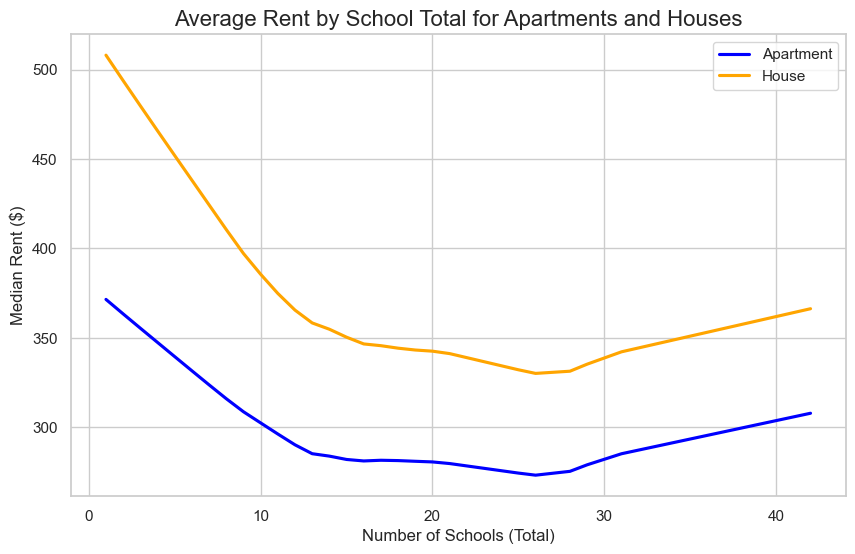

In [68]:
df_apartment = df[df['Apartment'] == 1].groupby('school_total')['Median'].mean()
df_house = df[df['Apartment'] == 0].groupby('school_total')['Median'].mean()

plt.figure(figsize=(10, 6))
sns.regplot(x=df_apartment.index, y=df_apartment.values, label='Apartment', lowess=True, scatter=False, color='blue')
sns.regplot(x=df_house.index, y=df_house.values, label='House', lowess=True, scatter=False, color='orange')

plt.title('Average Rent by School Total for Apartments and Houses', fontsize=16)
plt.xlabel('Number of Schools (Total)', fontsize=12)
plt.ylabel('Median Rent ($)', fontsize=12)

plt.legend()

plt.grid(True)
plt.show()

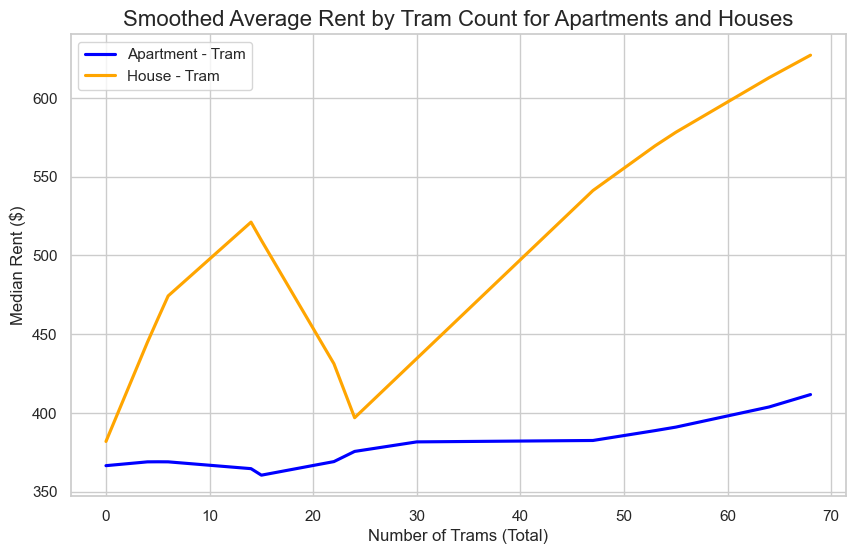

In [69]:
df_apartment_tram = df[df['Apartment'] == 1].groupby('tram_count')['Median'].mean()
df_house_tram = df[df['Apartment'] == 0].groupby('tram_count')['Median'].mean()

# To create the chart and smooth the curve, use tram_count
plt.figure(figsize=(10, 6))
sns.regplot(x=df_apartment_tram.index, y=df_apartment_tram.values, label='Apartment - Tram', lowess=True, scatter=False, color='blue')
sns.regplot(x=df_house_tram.index, y=df_house_tram.values, label='House - Tram', lowess=True, scatter=False, color='orange')

# Set the title and axis labels
plt.title('Smoothed Average Rent by Tram Count for Apartments and Houses', fontsize=16)
plt.xlabel('Number of Trams (Total)', fontsize=12)
plt.ylabel('Median Rent ($)', fontsize=12)

plt.legend()

plt.grid(True)
plt.show()

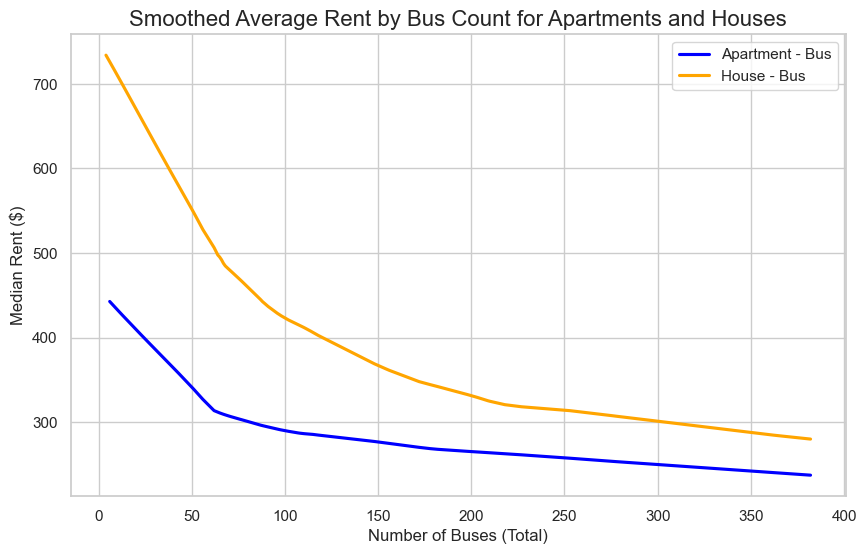

In [70]:
df_apartment_bus = df[df['Apartment'] == 1].groupby('bus_count')['Median'].mean()
df_house_bus = df[df['Apartment'] == 0].groupby('bus_count')['Median'].mean()

plt.figure(figsize=(10, 6))
sns.regplot(x=df_apartment_bus.index, y=df_apartment_bus.values, label='Apartment - Bus', lowess=True, scatter=False, color='blue')
sns.regplot(x=df_house_bus.index, y=df_house_bus.values, label='House - Bus', lowess=True, scatter=False, color='orange')

plt.title('Smoothed Average Rent by Bus Count for Apartments and Houses', fontsize=16)
plt.xlabel('Number of Buses (Total)', fontsize=12)
plt.ylabel('Median Rent ($)', fontsize=12)

plt.legend()

plt.grid(True)